In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
df1 = pd.read_csv('pulsar_data_test.csv')
df2 = pd.read_csv('pulsar_data_train.csv')
df = pd.concat([df1,df2],axis=0)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [42]:
df.shape

(17898, 9)

In [43]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [44]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [45]:
df.head()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17898 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      15396 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        16196 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17029 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Text(0, 0.5, 'DM-SNR Skewness')

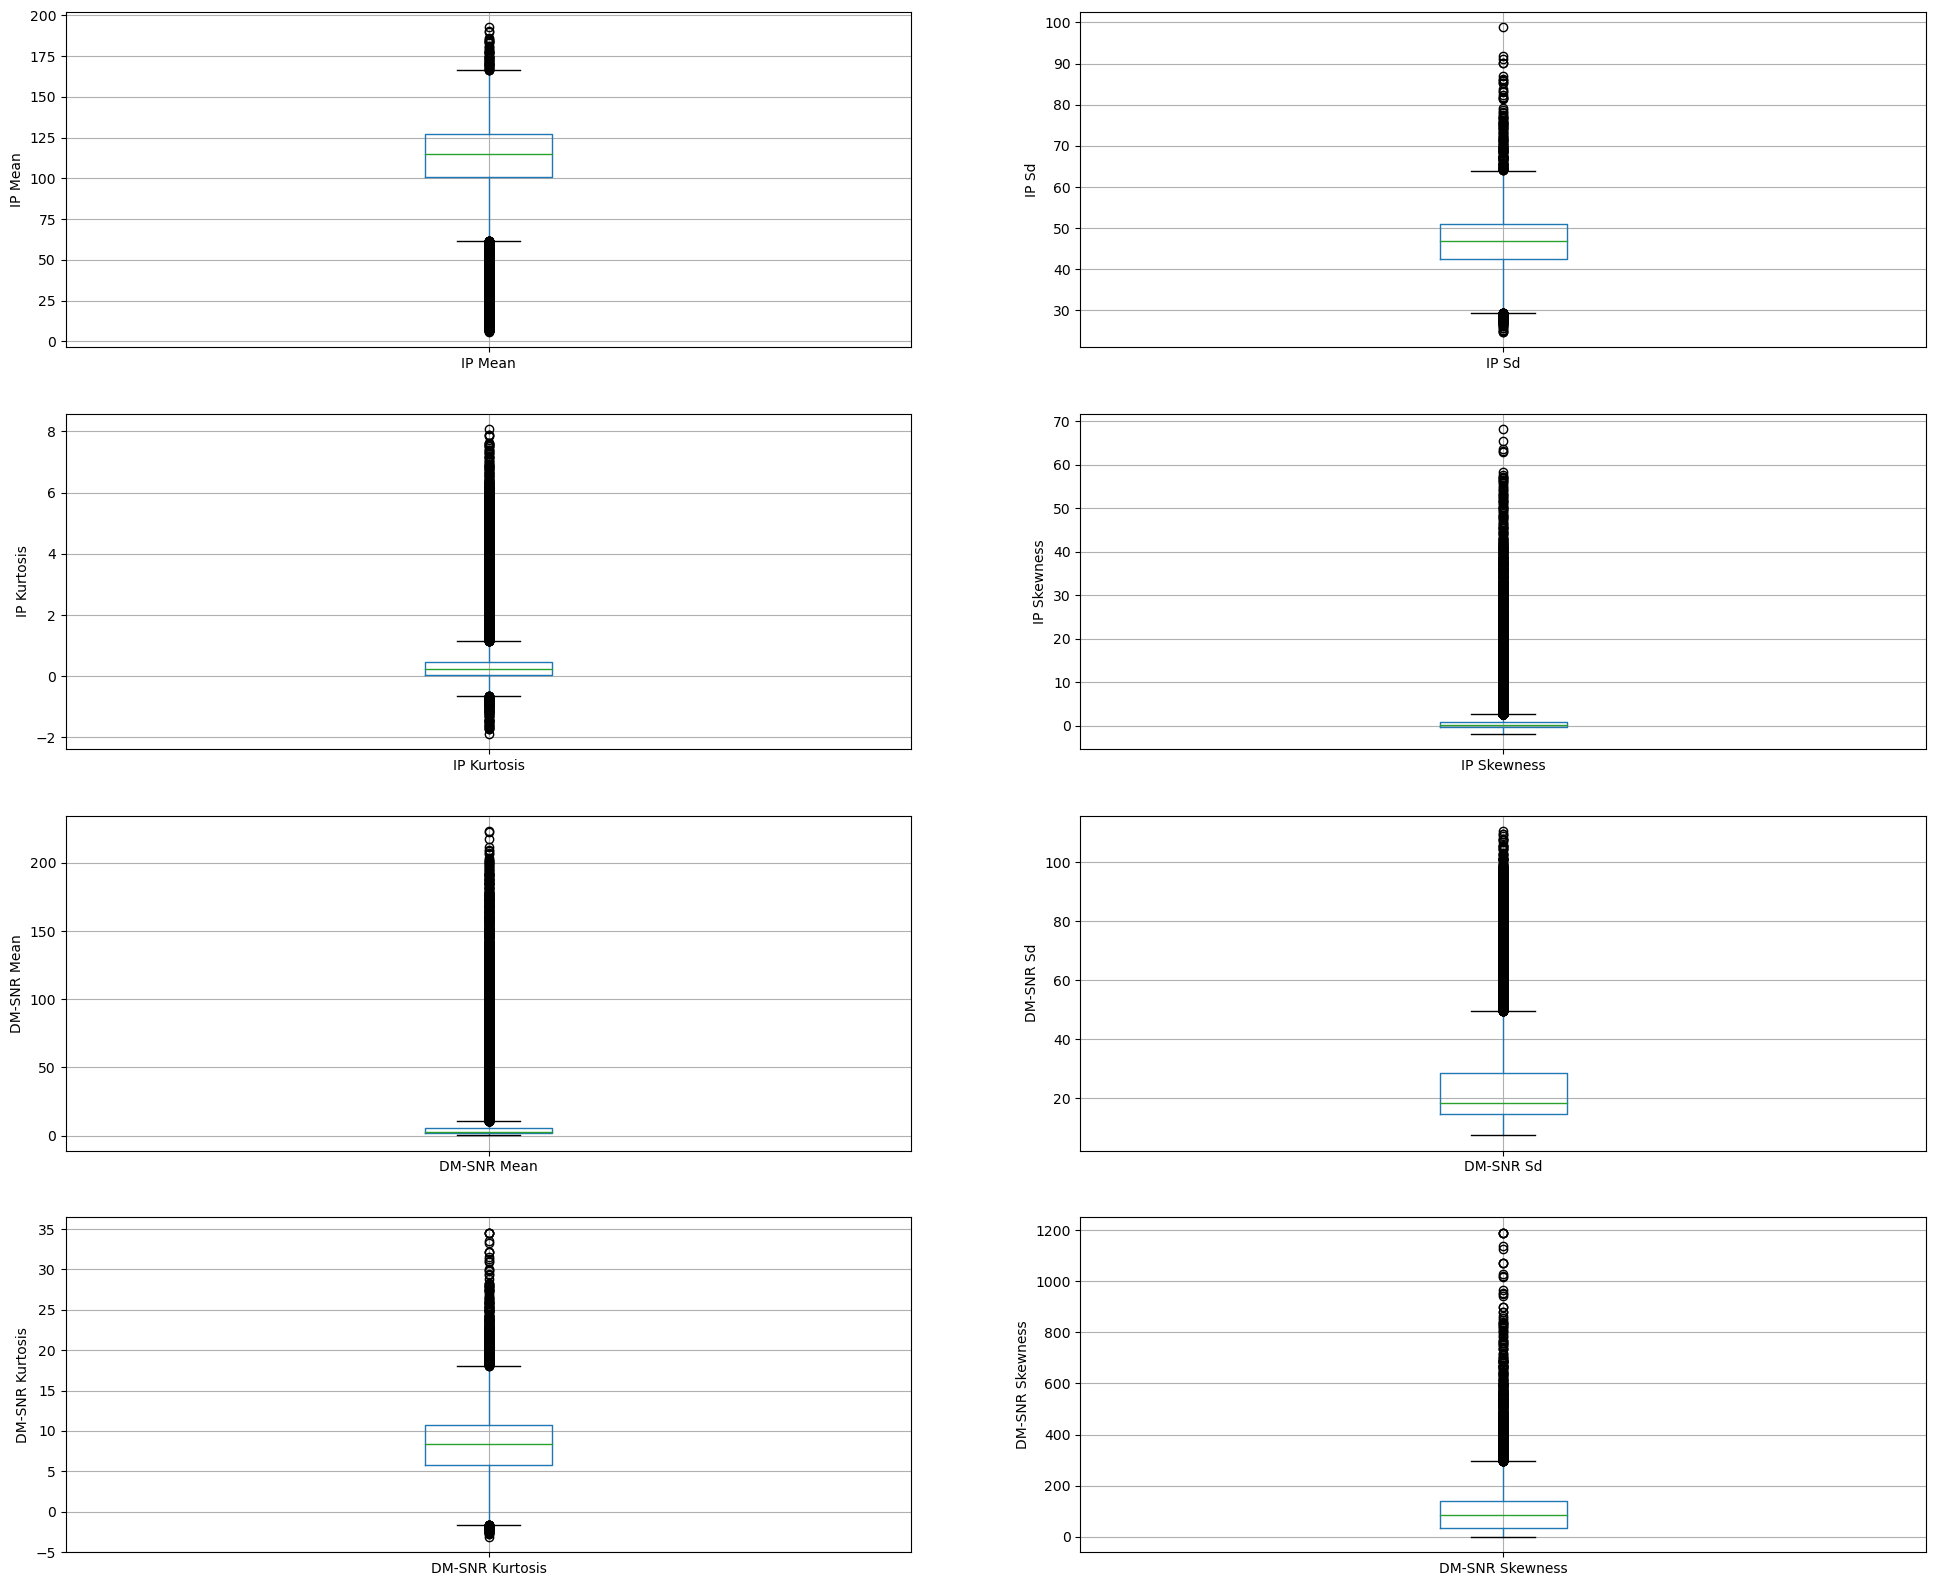

In [47]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

In [48]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [49]:
df.isna().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        2502
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1702
DM-SNR Kurtosis       0
DM-SNR Skewness     869
target_class       5370
dtype: int64

In [50]:
# drop null values in target_class
df.dropna(subset=['target_class'], inplace=True)

In [51]:
df.isna().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [52]:
for col in df.columns:
  if col != 'target_class' and df[col].isna().sum()>0:
    df[col].fillna(df[col].median(),inplace=True)

In [53]:
df.isna().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [54]:
df.shape

(12528, 9)

In [56]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [57]:
x = df.drop(['target_class'],axis=1)
y = df['target_class']

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#SVM
svm can handel outlairs by c param values i do not need to handel it by my self

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [23]:
svc = SVC(C=1000)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9792498004788508


In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2303
         1.0       0.83      0.94      0.88       203

    accuracy                           0.98      2506
   macro avg       0.91      0.96      0.93      2506
weighted avg       0.98      0.98      0.98      2506



<AxesSubplot: >

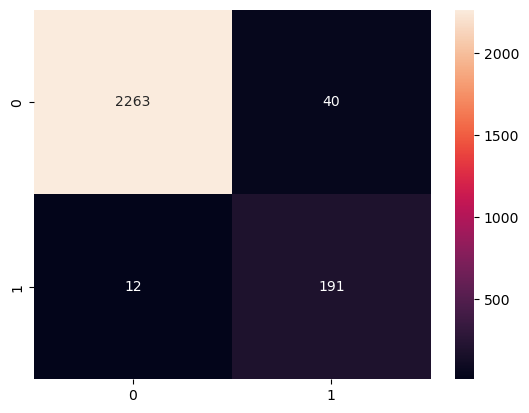

In [25]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')